In [4]:
#Données
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Normalisation et preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Réseau de neurons
import tensorflow as tf

#Metriques d'evaluations
from sklearn.metrics import classification_report, confusion_matrix

/home/nath/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nath/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nath/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nath/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

## On Importe les données et on les regarde. On constate qu'il y a des données manquantes (NaN) ainsi que des données catégoriques. ##

In [16]:
data = pd.read_csv('../dataset/athlete_events.csv')

In [7]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## Labels

Pour une première itération simple, on peut voir qu'il y a 4 label pour les médailles : NaN, Gold, Bronze, Silver. 

Quelle soit argent bronze ou or, on considère le label comme un 1 et les 'défaites' (NaN) sans médailles comme un 0. Cela nous permet de retirer les labels manquant pour les médailles et de passer de données catégoriques à des données quantitatives.

In [17]:
data['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [18]:
data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)

In [19]:
data['Medal']

0         0
1         0
2         0
3         1
4         0
         ..
271111    0
271112    0
271113    0
271114    0
271115    0
Name: Medal, Length: 271116, dtype: int64

## Data Cleaning

On commence par abandonné les données qui ne sont pas intéressante : ID, Name, Games.

In [20]:
data = data.drop(['ID','Name','Games'], axis=1)

In [21]:
data

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,M,30.0,185.0,96.0,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


Maintenant que nous sommes avec les données qui nous intéresse, on vérifie qu'il n'y a pas de données manquantes ailleurs dans le dataset :

In [22]:
data.isna().sum()

Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

Pour voir combien cela représente dans l'ensemble du dataset :

In [24]:
data.isna().mean()

Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.000000
dtype: float64

3% pour l'âge 22/23% pour le poids et la taille. On peut remplacer les valeurs manquantes par la valeur moyenne. Il faut cependant prendre en compte le fait que homme et femme ont des poids moyen et taille moyenne différente. 

In [29]:
data.groupby(['Medal', 'Sex']).mean().astype(np.int)

Age  Height  Weight  Year
Medal Sex                           
0     F     23     167      59  1992
      M     26     178      75  1974
1     F     24     170      63  1992
      M     26     181      79  1966

On peut voir qu'il y a une différence clair entre homme et femme (Homme plus grand et plus lourds de manière généarale) et femme plus jeune.

On peut utiliser ces moyennes pour remplacer les valeurs manquantes :

In [30]:
for column in ['Age', 'Height', 'Weight']:
    data[column] = data.groupby(['Medal', 'Sex'])[column].apply(lambda x: x.fillna(x.mean()).astype(np.int))

In [35]:
print("Nombres de données manquantes : ", data.isna().sum().sum())

Nombres de données manquantes :  0


,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,24,180,80,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,23,170,60,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,24,178,75,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,34,181,79,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,21,185,82,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,M,29,179,89,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,M,27,176,59,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,M,27,176,59,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,M,30,185,96,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


## Encoding

On récupére toutes les valeurs catérogiques dans chaque colonnes, afin de pouvoir les encoder avec un one hot encodin ou un encoding binaire dans le cas des saisons et sexe (puisqu'il n'y a que deux valeurs).

In [36]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Sex': 2,
 'Team': 1184,
 'NOC': 230,
 'Season': 2,
 'City': 42,
 'Sport': 66,
 'Event': 765}

In [37]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [39]:
data = binary_encode(
    data,
    columns=['Sex', 'Season'],
    positive_values=['M', 'Summer']
)

data = onehot_encode(
    data,
    columns=['Team', 'NOC', 'City', 'Sport', 'Event'],
    prefixes=['T', 'N', 'C', 'S', 'E']
)

In [40]:
print("Données catégoriques restantes : ", len(data.select_dtypes('object').columns))

Données catégoriques restantes :  0


## Correlations des features :

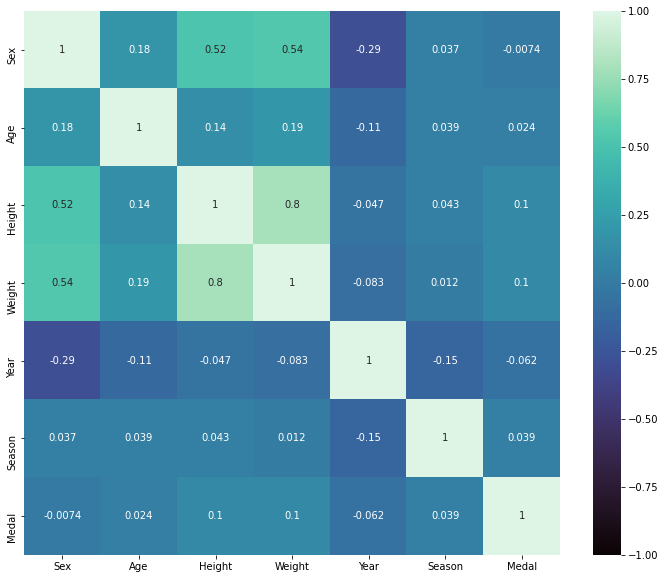

In [41]:
corr = data.loc[:, :'Medal'].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

Les plus grosses correlations sont sur le poids et la taille (IMC en soit).

On constate égalemment que les correlations de la colonne 'Medal' sont assez faible.

## Normalisation :

In [ ]:
On va scale les données entre 0 et 1 

In [42]:
y = data['Medal'].copy() # On conserve les medailles de manière séparé, on ne veut pas normaliser notre label
X = data.drop('Medal', axis=1).copy() # On mets le reste du dataset (hors medal) dans X

In [46]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

MemoryError: Unable to allocate 4.63 GiB for an array with shape (2293, 271116) and data type int64

In [ ]:
# Données de training et de test séparé en 70% / 30%. Il faudrait idéalement ajouté une validation et faire du 60/20/20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100) 

## Training
Avant de commencer le training, on regarde la représentation de chaque classe (1 => à gagné une medaille, 0=> n'as pas gagné de médaille)
y_train étant un array de 0 et de 1, on peut simplement calculer la représenation de ces calsses via un mean :

In [47]:
print(" Distribution des classes : {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

NameError: name 'y_train' is not defined

On voit qu'il ya une grosse disparité avec presque 15% de médaille gagné (Label 1) et 85% de médaill perdu (Label 0).

Cela crée un désiquilibre dans le dataset qu'il faudra prendre en compte sur le résultat du model.

Pour le modèle, on utilise 3 layers :

    * Un layer d'input
    * un layer Dense avec une activation Relu
    * Un layer Dense d'ouput avec une activation sigmoid (>0.5 => classe 1, <0.5 => class 0)
   
On utilisera l'accuracy et l'air under the curve ( + ROC) (https://towardsdatascience.com/understanding-the-roc-and-auc-curves-a05b68550b69) comme metrics puisqu'il y a un désiquilibre des classes dans le dataset.

On arrête l'entrainement du modèle si au bout de 3 epochs il n'y a pas d'améliorations.

In [ ]:
inputs = tf.keras.Input(shape=(X.shape[1]))On regardayers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

## RESULTATS

In [ ]:
model.evaluate(X_test, y_test)

On a donc une accracy à 91% et une AUC à 89%.

Ce qui est plutôt bon comme résultat au vu du déséquilibre présent dans le dataset ainsi que de la faible correlation vu dans la heatmap entre le fait d'avoir gagné une médaille et les features présent dans le dataset.

In [ ]:
y_true = np.array(y_test)
y_pred = np.squeeze(np.array(model.predict(X_test) >= 0.5, dtype=np.int))

In [ ]:
print("Classification :\n\n", classification_report(y_true, y_pred))

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

On constate une grande précision sur la classe 0 (médaille non gagné), ce qui est attendu puisqu'on a un grand nombre de representations de cette classe dans le dataset.
La précision pour la classe 1 (médaille gagné) est plutôt bonne avec 84%.

Cependant, si on regarde le score de recall, on constate un bon score sur la classe 0 (médaille non gagné) mais seulement 53% de recall sur la classe 1 (médaille gagné). Ce n'est pas loin d'un pile ou face.

Si on regarde la matrice de confusion on constate effectivement qu'il y a quasiment autant de vrai positif que de faux négatifs.

Le modèle est donc sûrement overfit par le désiquilibre du dataset et le manque de correlations dans les données sur la victoire d'une médaille.